#<h1> Importing All the Libraries and Connect with Google Drive </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import random
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

#<h1> PreProcessing <h1>

In [2]:
#@title Loading The Dataset and Triming Columns
df = pd.read_csv("data2.csv")
df.drop(["country","source"], inplace=True, axis=1) 
df.drop(df.columns[[27]],axis=1,inplace=True)
print(df)
print("DataSet Rows and Columns :" , df. shape)


       M1  M2  M3  M4  M5  M6  M7  M8  M9  N1  ...  N9  P1  P2  P3  P4  P5  \
0       4   4   4   4   4   4   4   3   4   2  ...   4   3   4   3   2   4   
1       2   1   5   2   2   1   2   2   3   1  ...   2   1   1   1   5   4   
2       3   3   3   5   1   1   5   5   3   2  ...   5   3   5   3   1   3   
3       5   5   4   5   5   5   5   5   5   5  ...   5   5   1   5   2   5   
4       4   4   2   5   5   5   4   1   4   3  ...   5   4   5   3   1   4   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
18187   1   5   2   4   4   5   4   3   5   4  ...   2   3   3   3   3   5   
18188   5   4   5   4   5   4   5   4   5   4  ...   3   3   2   2   1   5   
18189   4   3   3   4   2   3   4   3   4   3  ...   3   2   5   3   1   1   
18190   5   4   3   3   4   4   4   3   4   3  ...   4   4   3   3   4   4   
18191   4   4   4   5   3   4   4   3   3   3  ...   4   3   3   3   2   4   

       P6  P7  P8  P9  
0       4   4   4   4  
1       1   5  

In [4]:
#@title Creating the Label Data for the Dataset

#Calculating the mean for each class
M_mean = df.iloc[:,0:9].mean(axis=1)
N_mean = df.iloc[:,9:18].mean(axis=1)
P_mean = df.iloc[:,18:27].mean(axis=1)

#Finding out the difference between mean and standard value for each class
dark_class= []
for i in range( len(df) ):
  m_difference = (3.86 - M_mean[i])
  n_difference = (3.68 - N_mean[i])
  p_difference = (3.40 - P_mean[i])

  minimum = min(m_difference,n_difference,p_difference)
  
  if minimum == m_difference:
    dark_class.append("M")

  elif minimum == n_difference:
    dark_class.append("N")
  
  else :
    dark_class.append("P")
#saving weights
#df2 = pd.DataFrame(dark_class)
#df2.to_csv("file1.csv")
#Adding the Class to Dataframe
df["Class"] = dark_class

#Exploratory Data Analysis (EDA)

<Axes: xlabel='Class', ylabel='count'>

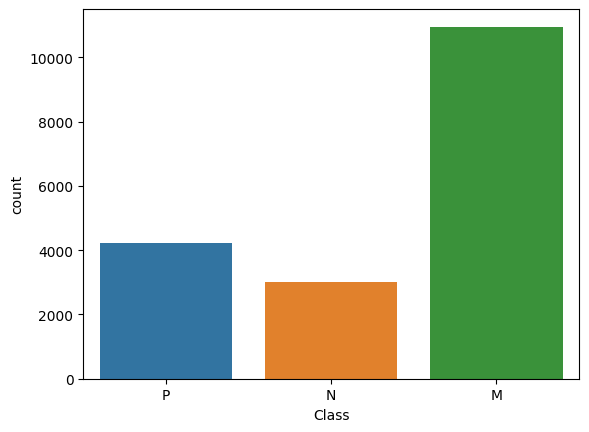

In [107]:
sns.countplot(data=df,x='Class')

([<matplotlib.patches.Wedge at 0x212ccb9c9d0>,
 [Text(-1.0436212225222066, -0.34764168895754655, 'M'),
  Text(1.078974834048268, -0.21404043424201957, 'P'),
  Text(0.5440671113949992, 0.9560287539076958, 'N')],
 [Text(-0.5692479395575671, -0.189622739431389, '60.2%'),
  Text(0.5885317276626917, -0.1167493277683743, '23.3%'),
  Text(0.2967638789427268, 0.5214702294041976, '16.5%')])

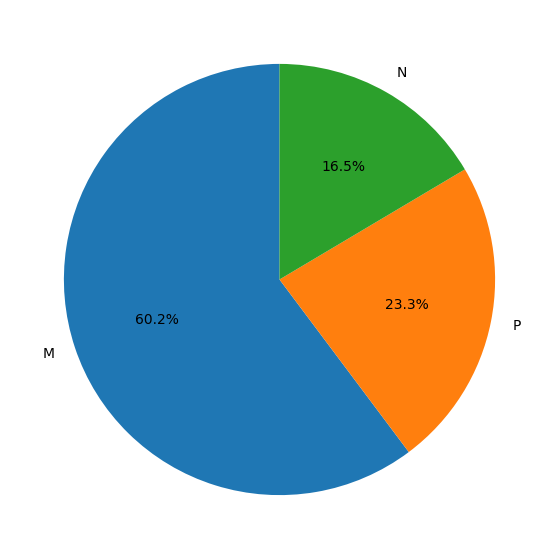

In [7]:
data=df['Class'].value_counts()
data

op=['M','P','N']
fig = plt.figure(figsize =(10, 7))
plt.pie(data,labels=op, startangle=90, autopct='%1.1f%%')


C:\Users\HP\AppData\Local\Temp\ipykernel_3036\1043088973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


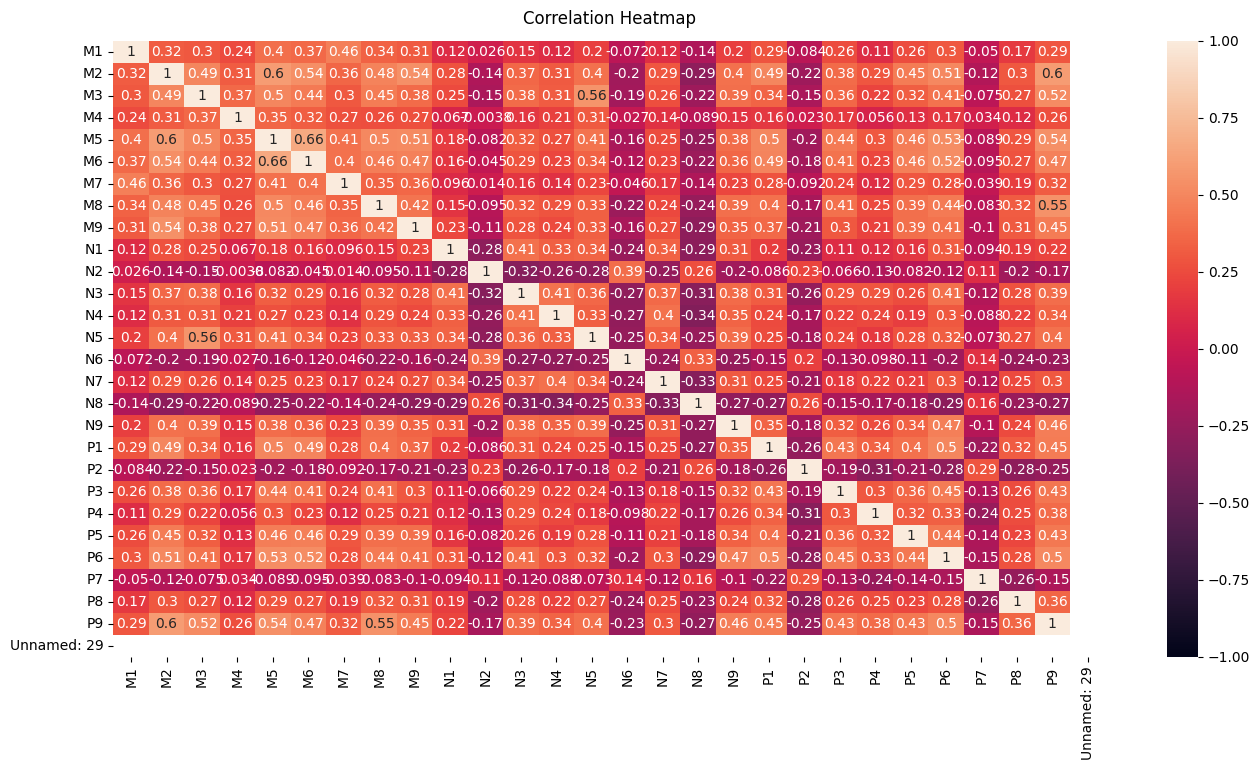

In [8]:
plt.figure(figsize=(16, 8))
correlation =df.corr()
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
dark = df

In [5]:
#@title Splitting into training and testing
X = df.drop("Class", axis=1) 
Y = df["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)

#Creating Logistic Regression Model Using SkLearn library

In [6]:
model=LogisticRegression(max_iter=40000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=40000)

In [7]:
predictions = model.predict(X_test)
logistic_predictions = predictions


In [8]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00      3232
           N       1.00      1.00      1.00       972
           P       1.00      1.00      1.00      1254

    accuracy                           1.00      5458
   macro avg       1.00      1.00      1.00      5458
weighted avg       1.00      1.00      1.00      5458



In [9]:
confusion_matrix(Y_test,predictions)

array([[3232,    0,    0],
       [   0,  972,    0],
       [   0,    0, 1254]], dtype=int64)

#Creating A Model From Scratch

In [113]:
#@title Loading the previously trained weights
output = pd.read_csv("file1.csv")

In [114]:
#@title Hypothesis Function
def hypo(weights,x_values):
  
  if len(weights)-1 != len(x_values):
  print("Sorry there is something wrong with your weight vector or X values")

  
  #Adding the bias with our return value
  hypothesis_value = weights[0]
  for i in range( 1, len(weights) ):
    hypothesis_value += ( weights[i] * x_values[i-1])
  
  return 1/(1 + np.exp(-hypothesis_value) )

In [115]:
#@title Gradient Function

def gradient(X,Y,weights,learning_rate,predictions):

  no_of_weights = len(weights)
  no_of_rows = len(X)
  no_of_columns = len(X[0])

  new_weights=[0 for i in range( no_of_weights )] 
 

  if no_of_columns+1  != no_of_weights:
    raise Exception("Theres something wrong with the no of colums and no of weights") 

  for m in range(no_of_weights):
    
    hold = 0
    
    for i in range ( no_of_rows ) :  
      if m == 0:
        hold += (  predictions[i] - Y[i] ) *  1 
      elif m > 0:
        hold += (  predictions[i] - Y[i] ) * X[i][m-1]
  

    gradient = learning_rate * ( hold / no_of_rows )
    new_weights[m] = weights[m] - gradient

   
  return new_weights
   

In [116]:
#@title Model Train Function
def train_model(X,Y,total_epoch,learning_rate , previous_weights = [-1] ):
  epoch_list=[]
  accuracy_list=[]
  X_numpy = X.to_numpy()
  Y_numpy = Y.to_numpy()
  if len(previous_weights) == 1:
    weights = [ random.randint(-5,5) for i in range ( len(X_numpy[0]) + 1 ) ]
  else:
    weights = previous_weights
  
  for epoch in range(1, total_epoch+1 ):
    
      
    predictions = [ hypo(weights,X_numpy[i]) for i in range( len(X_numpy) ) ]
    y_pred  = [ 1 if i > 0.5 else 0 for i in predictions ]
   
    if epoch % 10 == 0:
      epoch_list.append(epoch)
      accuracy_list.append(metrics.accuracy_score(Y ,y_pred))
      print("Epoch: " ,epoch , "/" ,total_epoch , end = '')
      print(" Accuracy:", metrics.accuracy_score(Y ,y_pred)*100 , "%", )
    
    weights = gradient(X_numpy,Y_numpy,weights,learning_rate,predictions)

  print("Graph ") 
  plt.plot(epoch_list, accuracy_list)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Graph!')
  plt.show()
  return weights


Epoch:  10 / 100 Accuracy: 62.14072561645987 %
Epoch:  20 / 100 Accuracy: 58.559761269043506 %
Epoch:  30 / 100 Accuracy: 58.94455787655096 %
Epoch:  40 / 100 Accuracy: 59.21155960420921 %
Epoch:  50 / 100 Accuracy: 59.61991518768651 %
Epoch:  60 / 100 Accuracy: 59.93403486728444 %
Epoch:  70 / 100 Accuracy: 60.30312549081201 %
Epoch:  80 / 100 Accuracy: 60.76645201821894 %
Epoch:  90 / 100 Accuracy: 61.33186744149521 %
Epoch:  100 / 100 Accuracy: 61.763782000942356 %
Graph 


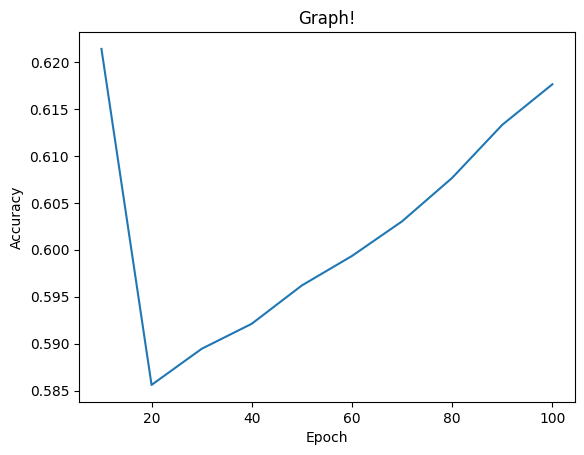

In [117]:
#Model For Machiavanelistitc ( M VS REST )
Y_train_M = Y_train.replace(["M","N","P"],[1,0,0])
previous_weights_m = output.iloc[0,1:]
weights_m = previous_weights_m
weights_m = train_model(X_train,Y_train_M,100,0.1 , previous_weights_m)


Epoch:  10 / 100 Accuracy: 77.13994031726088 %
Epoch:  20 / 100 Accuracy: 77.8938275482959 %
Epoch:  30 / 100 Accuracy: 78.1058583320245 %
Epoch:  40 / 100 Accuracy: 78.2864771477933 %
Epoch:  50 / 100 Accuracy: 78.5927438354013 %
Epoch:  60 / 100 Accuracy: 78.92256949897912 %
Epoch:  70 / 100 Accuracy: 79.09533532275798 %
Epoch:  80 / 100 Accuracy: 79.51154389822523 %
Epoch:  90 / 100 Accuracy: 79.90419349772263 %
Epoch:  100 / 100 Accuracy: 80.17904821737082 %
Graph 


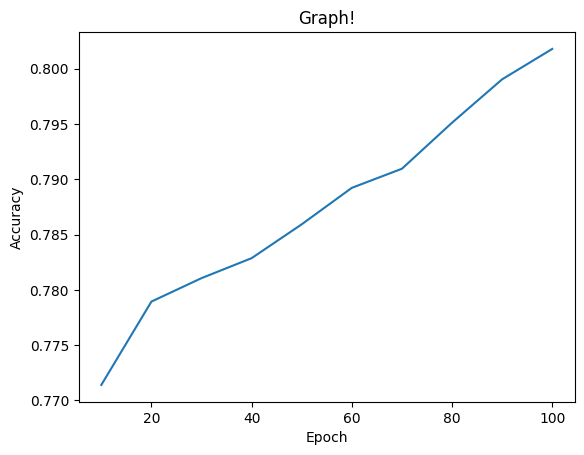

In [66]:
#Model For Narcissistic (N VS REST )
Y_train_N = Y_train.replace(["M","N","P"],[0,1,0])
previous_weights_n = output.iloc[1,1:]
weights_N = train_model(X_train,Y_train_N,100,0.1, previous_weights_n)

Epoch:  10 / 100 Accuracy: 69.19271242343333 %
Epoch:  20 / 100 Accuracy: 69.53039107900109 %
Epoch:  30 / 100 Accuracy: 70.03298256635779 %
Epoch:  40 / 100 Accuracy: 70.33924925396576 %
Epoch:  50 / 100 Accuracy: 70.77901680540286 %
Epoch:  60 / 100 Accuracy: 71.17951939689021 %
Epoch:  70 / 100 Accuracy: 71.54075702842782 %
Epoch:  80 / 100 Accuracy: 71.8784356839956 %
Epoch:  90 / 100 Accuracy: 72.42029213130202 %
Epoch:  100 / 100 Accuracy: 72.76582377885975 %
Graph 


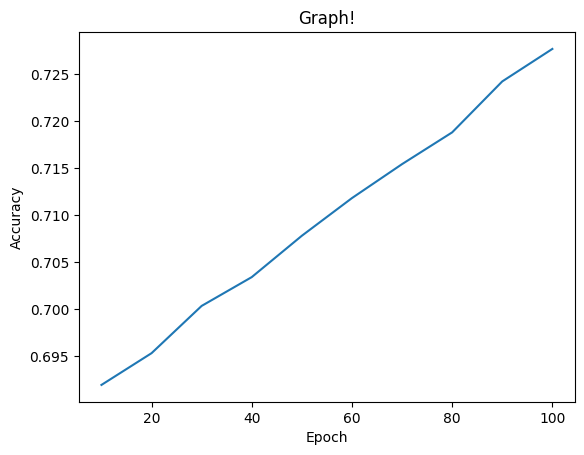

In [67]:
#Model For Psychopath (P VS REST )
Y_train_P = Y_train.replace(["M","N","P"],[0,0,1])
previous_weights_P = output.iloc[2,1:]
weights_P = train_model(X_train,Y_train_P,100,0.1,previous_weights_P)

In [68]:
#@title Saving the weights of each model

output = pd.DataFrame([weights_m,weights_N,weights_P])
output.index = ['Weights_M', 'Weights_N', 'Weights_P']

output.to_csv('output.csv')


In [69]:
def return_predictions(weights_m,weights_n,weights_p,X):
  X = X.to_numpy()

  predictions = []

  for i in range ( len(X) ):
    probability_m = hypo(weights_m,X[i])
    probability_n = hypo(weights_n,X[i])
    probability_p = hypo(weights_p,X[i])

    #print( probability_m , probability_n , probability_p , sep= ' ||||| ')
    
    if probability_m >= probability_n and probability_m >= probability_p:
      #print("M" , "M_prob" , probability_m , "N_prob" , probability_n , "P_prob" , probability_p)
      predictions.append("M")
    elif  probability_n >= probability_m and probability_n >= probability_p:
      #print("N" , "M_prob" , probability_m , "N_prob" , probability_n , "P_prob" , probability_p)
      predictions.append("N")
    elif  probability_p >= probability_m and probability_p >= probability_n:
      #print("P" , "M_prob" , probability_m , "N_prob" , probability_n , "P_prob" , probability_p)
      predictions.append("P")
    
  return predictions





In [71]:
scratch_model_predict = return_predictions(weights_m,weights_N,weights_P,X_test)
model_predict = scratch_model_predict
metrics.accuracy_score(Y_test,model_predict )


0.5899596921949432

#Creating A SVM Model


In [72]:
#@title SVM Model Train
model = LinearSVC( max_iter = 500000)
o_vs_o = OneVsOneClassifier(model)
o_vs_o.fit(X_train, Y_train)
Y_pred_SVM = o_vs_o.predict(X_test)

In [73]:
print(classification_report(Y_test,Y_pred_SVM))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00      3232
           N       1.00      1.00      1.00       972
           P       1.00      1.00      1.00      1254

    accuracy                           1.00      5458
   macro avg       1.00      1.00      1.00      5458
weighted avg       1.00      1.00      1.00      5458



# Performance Analysis

##Confusion Matrix Analysis

Confusion matrix of Logistic Regression ( Scratch) Model: 


<Axes: >

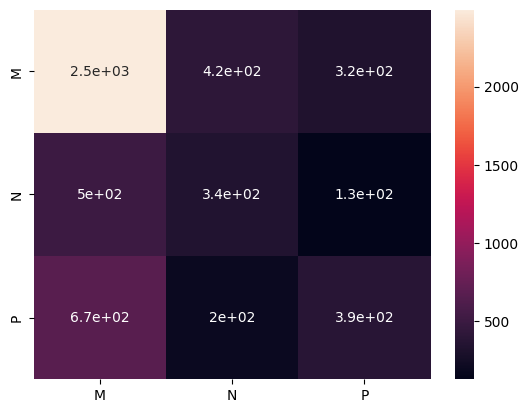

In [74]:
print("Confusion matrix of Logistic Regression ( Scratch) Model: ")
sns.heatmap(confusion_matrix(Y_test,model_predict)  , annot = True , xticklabels = ["M","N","P"] , yticklabels =["M","N","P"]  )


Confusion Matrix of Logistic Regression (Library) Model: 


<Axes: >

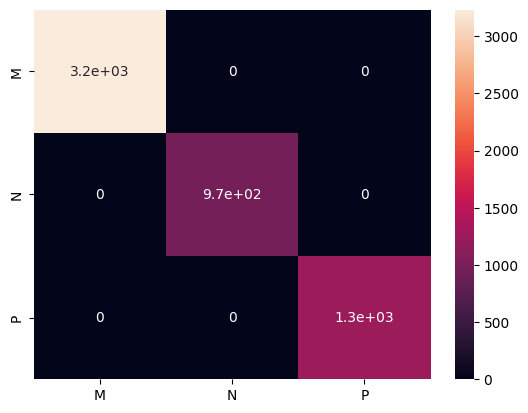

In [75]:
print("Confusion Matrix of Logistic Regression (Library) Model: ")
sns.heatmap(confusion_matrix(Y_test,predictions)  , annot = True , xticklabels = ["M","N","P"] , yticklabels =["M","N","P"]  )

Confusion Matrix of SVM(model):


<Axes: >

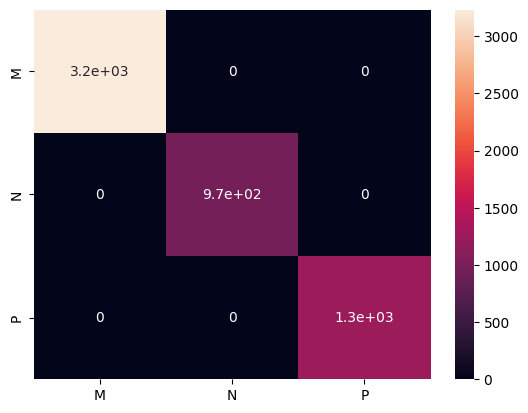

In [76]:
print("Confusion Matrix of SVM(model):")
sns.heatmap(confusion_matrix(Y_test,Y_pred_SVM)  , annot = True , xticklabels = ["M","N","P"] , yticklabels =["M","N","P"]  )

##Wrong Prediction Analysis For One vs All Models

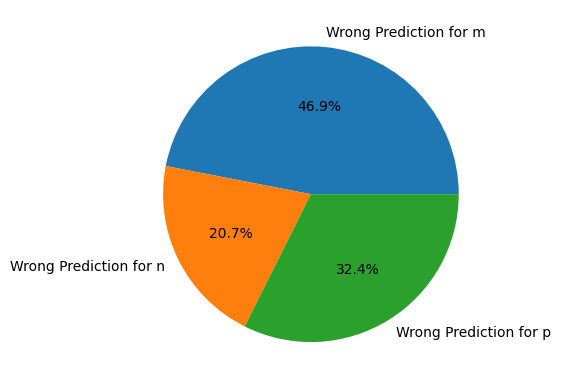

wrong prection for M, N and P are   1115 491 769


In [77]:
counterm = 0
countern = 0
counterp = 0
for i in range ( len(Y_test) ):
  if Y_test.iloc[i] == "M" and hypo( weights_m , X_test.iloc[i] ) <= 0.5:
    counterm += 1
 
  elif Y_test.iloc[i] == "N" and hypo( weights_m , X_test.iloc[i] ) > 0.5:
    countern += 1
  
  elif Y_test.iloc[i] == "P" and hypo( weights_m , X_test.iloc[i] ) > 0.5:
    counterp += 1
  
   
plt.pie( [counterm,countern,counterp] , labels = ["Wrong Prediction for m", "Wrong Prediction for n", "Wrong Prediction for p"] ,autopct='%1.1f%%')
plt.show()
print("wrong prection for M, N and P are  ",counterm, countern, counterp )

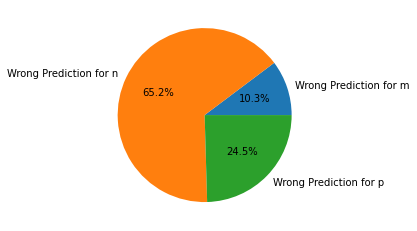

wrong prection for M, N and P are   28 178 67


In [ ]:
counterm = 0
countern = 0
counterp = 0
for i in range ( len(Y_test) ):
  if Y_test.iloc[i] == "M" and hypo( weights_N , X_test.iloc[i] ) > 0.5:
    counterm += 1
 
  elif Y_test.iloc[i] == "N" and hypo( weights_N , X_test.iloc[i] ) <= 0.5:
    countern += 1
  
  elif Y_test.iloc[i] == "P" and hypo( weights_N , X_test.iloc[i] ) > 0.5:
    counterp += 1
  
   
plt.pie( [counterm,countern,counterp] , labels = ["Wrong Prediction for m", "Wrong Prediction for n", "Wrong Prediction for p"] ,autopct='%1.1f%%')
plt.show()

print("wrong prection for M, N and P are  ",counterm, countern, counterp )


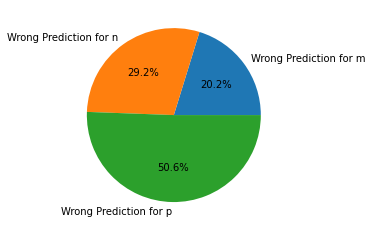

wrong prection for M, N and P are   104 150 260


In [ ]:
counterm = 0
countern = 0
counterp = 0
for i in range ( len(Y_test) ):
  if Y_test.iloc[i] == "M" and hypo( weights_P , X_test.iloc[i] ) > 0.5:
    counterm += 1
 
  elif Y_test.iloc[i] == "N" and hypo( weights_P , X_test.iloc[i] ) > 0.5:
    countern += 1
  
  elif Y_test.iloc[i] == "P" and hypo( weights_P , X_test.iloc[i] ) <= 0.5:
    counterp += 1
  
   
plt.pie( [counterm,countern,counterp] , labels = ["Wrong Prediction for m", "Wrong Prediction for n", "Wrong Prediction for p"] ,autopct='%1.1f%%')
plt.show()

print("wrong prection for M, N and P are  ",counterm, countern, counterp )


##Wrong Prediction Analysis for other class

Wrong Predictions For M Class: 233


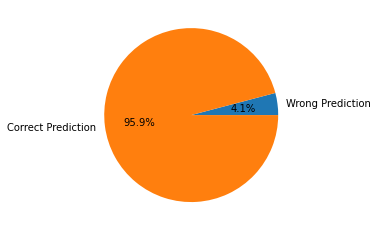

In [ ]:
counter = 0
for i in range ( len(Y_test) ):
  if Y_test.iloc[i] != "M" and hypo( weights_m , X_test.iloc[i] ) > 0.5:
    counter += 1

print("Wrong Predictions For M Class:", counter)
plt.pie( [counter,len(Y_test)] , labels = ["Wrong Prediction", "Correct Prediction"] , autopct='%1.1f%%')
plt.show()

Wrong Predictions for N Class: 94


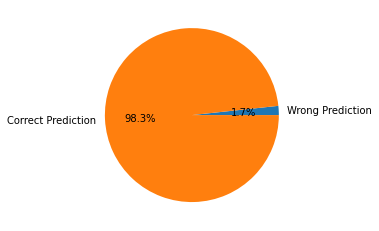

In [ ]:
counter = 0
for i in range ( len(Y_test) ):
  if Y_test.iloc[i] != "N" and hypo( weights_N , X_test.iloc[i] ) > 0.5:
    
    counter += 1

print("Wrong Predictions for N Class:", counter)

plt.pie( [counter,len(Y_test)] , labels = ["Wrong Prediction", "Correct Prediction"] , autopct='%1.1f%%')
plt.show()

In [ ]:
# For library
accuracy= metrics.accuracy_score(Y_test, predictions)
precision= metrics.precision_score(Y_test, predictions, average ='weighted')
recall= metrics.recall_score(Y_test, predictions, average ='weighted')



Wrong Predictions for P Class: 256


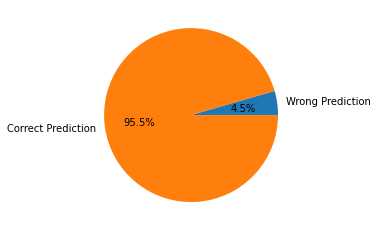

In [ ]:
counter = 0
for i in range ( len(Y_test) ):
  if Y_test.iloc[i] != "P" and hypo( weights_P , X_test.iloc[i] ) > 0.5:
    
    counter += 1

print("Wrong Predictions for P Class:", counter)

plt.pie( [counter,len(Y_test)] , labels = ["Wrong Prediction", "Correct Prediction"] ,autopct='%1.1f%%')
plt.show()

In [ ]:
def accuracy (Y_test, Y_pred):
  d=0
  n=0
  len_class= len(df['Class'].unique())
  c_m= confusion_matrix(Y_test, model_predict)
  for i in range (len_class):
    d= d+c_m[i][i]
  #print(d)
  for j in range(len_class):
    for k in range(len_class):
      n= n+c_m[j][k]
  #print(n)

  accuracy= d/n
  #print(accuracy) 
  return accuracy

#0.9662880175888604

In [ ]:
def precisionx (Y_test, Y_pred,i):
  d=0
  n=0
  ss=0
  len_class= len(df['Class'].unique())
  c_m= confusion_matrix(Y_test, model_predict)
  n= c_m[i][i]

  for j in range(len_class):
    d= d + c_m[j][i]
    ss= ss + c_m[i][j]
  

  precisionx= n/d
  return precisionx,d,ss

def precision(Y_test,model_predict):
  len_class= len(df['Class'].unique())
  u=0
  s=0

  for i in range (len_class):
  
    a,de,ss = precisionx(Y_test, model_predict,i)
    u= u+ (ss*a)
    s= s + de
  return u/s

In [ ]:
def recallx (Y_test, Y_pred,i):
  d=0
  n=0

  len_class= len(df['Class'].unique())
  c_m= confusion_matrix(Y_test, model_predict)
  n= c_m[i][i]

  for j in range(len_class):
    d= d + c_m[i][j]
    
  

  recallx= n/d
  return recallx,d

def recall(Y_test,model_predict):
  len_class= len(df['Class'].unique())
  u=0
  s=0

  for i in range (len_class):
  
    a,de = recallx(Y_test, model_predict,i)
    u= u+ (de*a)
    s= s + de
  return u/s

In [ ]:
# Accuray , Precision , Recall For scratch model
model_accuracy=accuracy(Y_test, model_predict)
model_precision= precision(Y_test,model_predict)
model_recall= recall(Y_test, model_predict)
#print(model_accuracy,model_precision,model_recall)

In [ ]:
# Accuray , Precision , Recall For SVM Model
accuracy_svm = metrics.accuracy_score(Y_test, Y_pred_SVM)
precision_svm = metrics.precision_score(Y_test, Y_pred_SVM,average='weighted')
recall_svm = metrics.recall_score(Y_test, Y_pred_SVM, average= 'weighted')


In [ ]:
# Accuray , Precision , Recall For Logistic Library Model
accuracy_logistic = metrics.accuracy_score(Y_test, logistic_predictions)
precision_logistic = metrics.precision_score(Y_test, logistic_predictions ,average='weighted')
recall_logistic = metrics.recall_score(Y_test, logistic_predictions , average= 'weighted')

Evaluation metrics With logistic regression(with built in library) 

In [ ]:
print("The accuracy with the built in library ", accuracy_logistic)
print("The precision with the built in library ", precision_logistic)
print("The recall with the built in library ", recall_logistic)

The accuracy with the built in library  1.0
The precision with the built in library  1.0
The recall with the built in library  1.0


Evaluation metrics With logistic regression(without built in library)

In [ ]:
print("The accuracy of the model ", model_accuracy)
print("The precision of the model ", model_precision)
print("The recall of the model ", model_recall)

The accuracy of the model  0.9530963722975448
The precision of the model  0.9528315695328735
The recall of the model  0.9530963722975448


Evaluation metrics with SVM Model

In [ ]:
print("The Accuracy of the SVM model",accuracy_svm)
print("The Precision of the SVM model",precision_svm)
print("The Recall of the SVM model",recall_svm)

The Accuracy of the SVM model 1.0
The Precision of the SVM model 1.0
The Recall of the SVM model 1.0


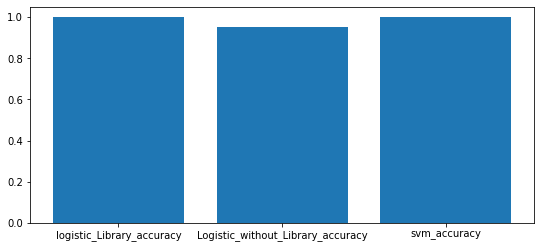

In [ ]:
fig = plt.figure(figsize = (7, 3))

ax = fig.add_axes([0,0,1,1])
Name = ['logistic_Library_accuracy','Logistic_without_Library_accuracy','svm_accuracy']
M = [accuracy_logistic,model_accuracy,accuracy_svm]

ax.bar(Name,M)
plt.show()

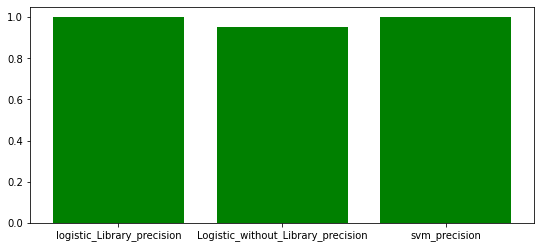

In [ ]:
fig = plt.figure(figsize = (7, 3))

ax = fig.add_axes([0,0,1,1])
Name = ['logistic_Library_precision','Logistic_without_Library_precision','svm_precision']
M = [precision_logistic,model_precision,precision_svm]

ax.bar(Name,M, color= 'Green')
plt.show()

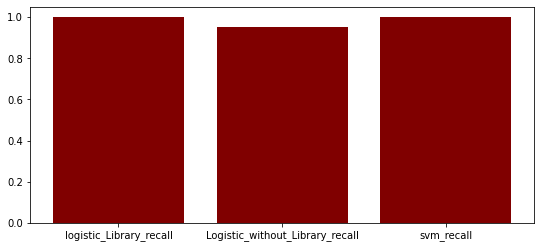

In [ ]:
fig = plt.figure(figsize = (7, 3))

ax = fig.add_axes([0,0,1,1])
Name = ['logistic_Library_recall','Logistic_without_Library_recall','svm_recall']
M = [recall_logistic,model_recall,recall_svm]

ax.bar(Name,M, color= 'maroon')
plt.show()

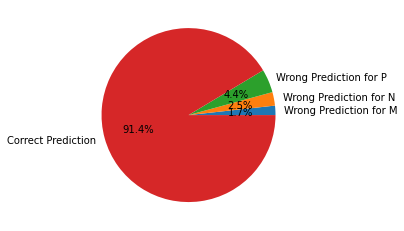

In [ ]:

plt.pie( [counterm,countern,counterp,len(Y_test)] , labels = ["Wrong Prediction for M","Wrong Prediction for N","Wrong Prediction for P", "Correct Prediction"] , autopct='%1.1f%%')
plt.show()